# Proyecto final 2023

# Matemáticas para Ciencia de Datos

#### Ejercicio 1. Haz un programa que dada una matriz $A$ y $k$ regrese $A^{(k)}$, $σ_1$, . . . $σ_{k+1}$. Usa la librería https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html.

In [1]:
# Importar librerías a utilizar
import numpy as np
from sklearn.decomposition import TruncatedSVD
from skimage import io
import matplotlib.pyplot as plt

c:\Users\ACF\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Crear función para obtener descomposición SVD truncada de una matriz, junto con los valores singulares respectivos.

In [2]:
# Definir función "truncated_svd_and_singular_values()"
def truncated_svd_and_singular_values(matrix, k):
    """Esta función recibe como input una matriz y un número entero k.
       Como output regresa la descomposición SVD truncada en k de la
       matriz y los primeros k+1 valores singulares"""

    try:
        # Descomposición SVD truncada
        svd = TruncatedSVD(n_components=k+1)
        svd.fit(matrix)

        # Obtener la matriz transformada A^(k)
        matrix_k = svd.transform(matrix)

        # Obtener los valores singulares σ_1, ..., σ_{k+1}
        singular_values = svd.singular_values_

        # Output matriz transformada y valores singulares
        return matrix_k, singular_values

    except ValueError:
        raise ValueError("El valor de k debe ser menor o igual al número de características en la matriz.")

Ejemplo de uso de la función.

In [3]:
# Matriz 200x300 con valores aleatorios entre 0 y 255
A = 255 * np.random.rand(200, 300)
# Valor entero k
k = 100

# Obtener la descomposición SVD truncada en k y los valores singulares
A_k, singular_values = truncated_svd_and_singular_values(A, k)

# Imprimir resultados
print("Matriz A^(k):\n")
print(A_k)
print("\nValores singulares σ_1, ..., σ_{k+1}:\n")
print(singular_values)

Matriz A^(k):

[[2169.43819358  308.77494327  144.20535156 ...   -5.09270112
    97.26465427  -71.89249055]
 [2228.55160183  -98.16312311   12.91832764 ...   -3.86225609
    30.81486424   34.75065397]
 [2306.73010306  141.24074738  -20.90392798 ... -111.6757725
    -6.23575289  -25.74999573]
 ...
 [2275.04960156 -152.47532709  -88.82887883 ...  114.96144101
    66.96095027  -59.22369129]
 [2227.6793497   143.95766203 -323.03115155 ...  -58.41873577
   -10.71491153   89.36471338]
 [2263.42951588 -333.80402686 -139.629719   ... -130.97726337
  -122.9927295    26.78439325]]

Valores singulares σ_1, ..., σ_{k+1}:

[31252.73299005  2304.01877568  2232.17497469  2190.32307796
  2178.0120165   2152.98079844  2113.89583352  2110.0407555
  2105.47252429  2091.33724587  2083.20871457  2073.12352135
  2042.53183091  2032.37790667  2017.73339993  2009.94734417
  1980.4981999   1979.52292739  1968.12046173  1941.84187914
  1933.32259098  1917.3158445   1905.5087279   1886.64743264
  1873.2164555   

#### Ejercicio 2. Crea una matriz de la "imagen en blanco". ¿Cuál es el rank de esa matriz? Responde la misma pregunta con la matriz corespondiente a una imagen nítida de la bandera de Indonesia y también de la bandera Italiana.

In [4]:
import numpy as np
# importamos el modulo pyplot, y lo llamamos plt
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
# comando de Jupyter para que las imagenes se muestren automaticamente
%matplotlib inline

EL rank de la matriz a partir de la imagen: 1


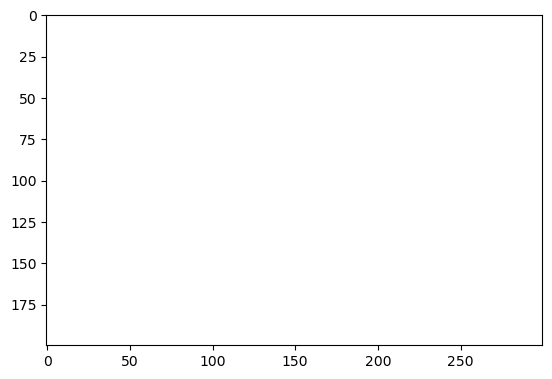

<Figure size 640x480 with 0 Axes>

In [5]:
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'

#tamaño de las matrices a visualizar
size=(200,300)

# IMAGEN BLANCA
# Una matriz de unos.
imagen_blanca = np.ones(size)

#visualizamos la matriz
#Se ve como una imagen blanca, ya que todos los elementos (pixeles) tienen intensidad 1
plt.imshow(imagen_blanca,vmin=0,vmax=1)

plt.figure()

# Calculando el rank de la matriz de la imagen en blanco
rango_imagen_blanca = np.linalg.matrix_rank(imagen_blanca)
print(f'EL rank de la matriz a partir de la imagen: {rango_imagen_blanca}')

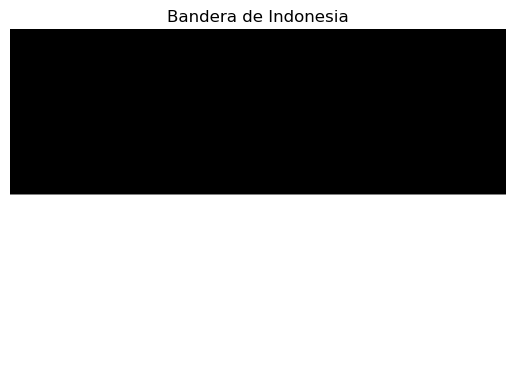

EL rank de la matriz a partir de la imagen de Indonesia: 1


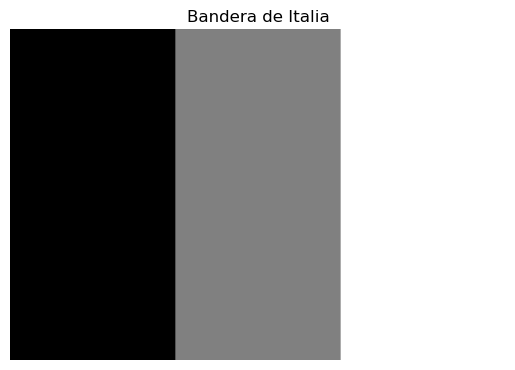

EL rank de la matriz a partir de la imagen de Italia: 1


In [6]:
# ------------------------------ Trabajando con las banderas -------------------------------------------------

# la ruta de cada imagen
path_indonesia = "../imagenes/Flag_of_Indonesia.png"
path_italia = "../imagenes/Flag_of_Italy.png"

# Cargando las imágenes de as banderas
imagen_indonesia = Image.open(path_indonesia)
imagen_italia = Image.open(path_italia)

# Convertiendo las imágenes a matrices NumPy de tamaño (200 x 300)
matriz_indonesia = np.array(imagen_indonesia.resize((300, 200)))
matriz_italia = np.array(imagen_italia.resize((300, 200)))

# Visualizando la bandera de Indonesia
plt.imshow(matriz_indonesia)
plt.title('Bandera de Indonesia')
plt.axis('off')
plt.show()

# Calculando el rank de la bandera de Indonesia
rango_indonesia = np.linalg.matrix_rank(matriz_indonesia)
print(f'EL rank de la matriz a partir de la imagen de Indonesia: {rango_indonesia}')

# Visualizando la bandera de Italia
plt.imshow(matriz_italia)
plt.title('Bandera de Italia')
plt.axis('off')
plt.show()

# Calculando el rank de la bandera de Italia
rango_italia = np.linalg.matrix_rank(matriz_italia)
print(f'EL rank de la matriz a partir de la imagen de Italia: {rango_italia}')

> El hecho de que todas las imágenes tengan un rank de 1 podría ser un indicativo de que las imágenes son bastante simples y pueden ser representadas con una sola dimensión (un solo vector). El rango de una matriz indica la cantidad de dimensiones linealmente independientes en esa matriz. Si todas las filas (o columnas) de una matriz son múltiplos escalares unas de otras, el rank será 1.
>
>Las imágenes con las que se trabajó en este ejercicio, se podría decir que son bastante uniformes en intensidad, por lo tanto, una sola dimensión es suficiente para representarlas linealmente.
>
>Si las imágenes de las banderas de Indonesia e Italia son bastante simples, es normal obtener un rango bajo.


#### Ejercicio 3. Elija una fotografía de tu interés. Encuentra la mejor aproximación de rango $k$ para $k$ = 2, 5, 10, 15. Conviértelos a imagen otra vez y obsérvalas junto con la imagen original. Puedes probar con otras imágenes y valores de $k$.

#### Definiendo funcion para obtener la mejor aproximación de rango k de una imagen

In [7]:
def aprox_rank_k(u, s, v, num):
    """ 
    Esta función toma los componentes de la descomposición SVD (u, s, vh) de una matriz y retorna 
    una aproximación de rango bajo, reteniendo solo los primeros 'num' valores y vectores singulares. 
    Efectivamente, comprime la información en la matriz original, resultando en una aproximación de menor rango.

    Parámetros:
    - u: Vectores singulares izquierdos obtenidos de la SVD.
    - s: Valores singulares obtenidos de la SVD.
    - v: Vectores singulares derechos obtenidos de la SVD.
    - num: Número de valores y vectores singulares a retener en la aproximación.

    Retorna:
    - aprox_rank_k: Aproximación de rango bajo de la matriz original.
    """
    u = u[:, :num]
    v = v[:num, :]
    s = s[:num]
    s = np.diag(s)
    my_low_rank = np.dot(np.dot(u, s), v)
    return my_low_rank

#### Definiendo funcion que separa la imagen en sus canales RGB, luego aplica la funcion anterior a cada canal y finalmente junta los canales para obtener la imagen aproximada de rango k y graficarla

In [8]:
def img_rank_k (img, valores_k):
    """
    Esta función toma una imagen y una lista de valores k y muestra la imagen original 
    junto a las aproximaciones de rango k de la imagen. 

    Parámetros:
    - img: Imagen a aproximar.
    - valores_k: Lista de valores k para las aproximaciones de rango k.
    """

    image = np.array(img) # Convertir imagen a array

    # Separar canales de color
    rojo = np.float64(image[:, :, 0]) 
    verde = np.float64(image[:, :, 1])
    azul = np.float64(image[:, :, 2])

    fig, axs = plt.subplots(1, len(valores_k) + 1) # Crear una figura con n subfiguras
    fig.set_size_inches(27, 9)

    # Mostrar la imagen original
    axs[0].imshow(image)
    axs[0].set_title('Original') 

    for i, k in enumerate(valores_k): # Recorrer los valores de k
        u, s, v = np.linalg.svd(rojo, full_matrices=False) # Descomposición SVD de la matriz de color rojo
        my_rank_k_r = aprox_rank_k(u, s, v, k) # Obtener la matriz de rango k rojo

        u, s, v = np.linalg.svd(verde, full_matrices=False) # Descomposición SVD de la matriz de color verde
        my_rank_k_g = aprox_rank_k(u, s, v, k) # Obtener la matriz de rango k verde

        u, s, v = np.linalg.svd(azul, full_matrices=False) # Descomposición SVD de la matriz de color azul
        my_rank_k_b = aprox_rank_k(u, s, v, k) # Obtener la matriz de rango k azul

        # Convertir a enteros de 8 bits cada canal para mostrar la imagen 
        new_red = np.uint8(my_rank_k_r) 
        new_green = np.uint8(my_rank_k_g) 
        new_blue = np.uint8(my_rank_k_b)

        my_array = np.array([new_red, new_green, new_blue]) # Combina los canales de color para obtener la imagen aproximada
        my_array = np.transpose(my_array, (1, 2, 0)) # Cambia el orden de los ejes para que sea (filas, columnas, canales)

        axs[i+1].imshow(my_array) # Mostrar la imagen aproximada
        axs[i+1].set_title('k = ' + str(k))

    plt.show()




#### Cargar imagenes que se van a utilizar

In [9]:
img1 = Image.open('../imagenes/maradona.png') # Abrir imagen
img2 = Image.open('../imagenes/sad_img.png') # Abrir imagen

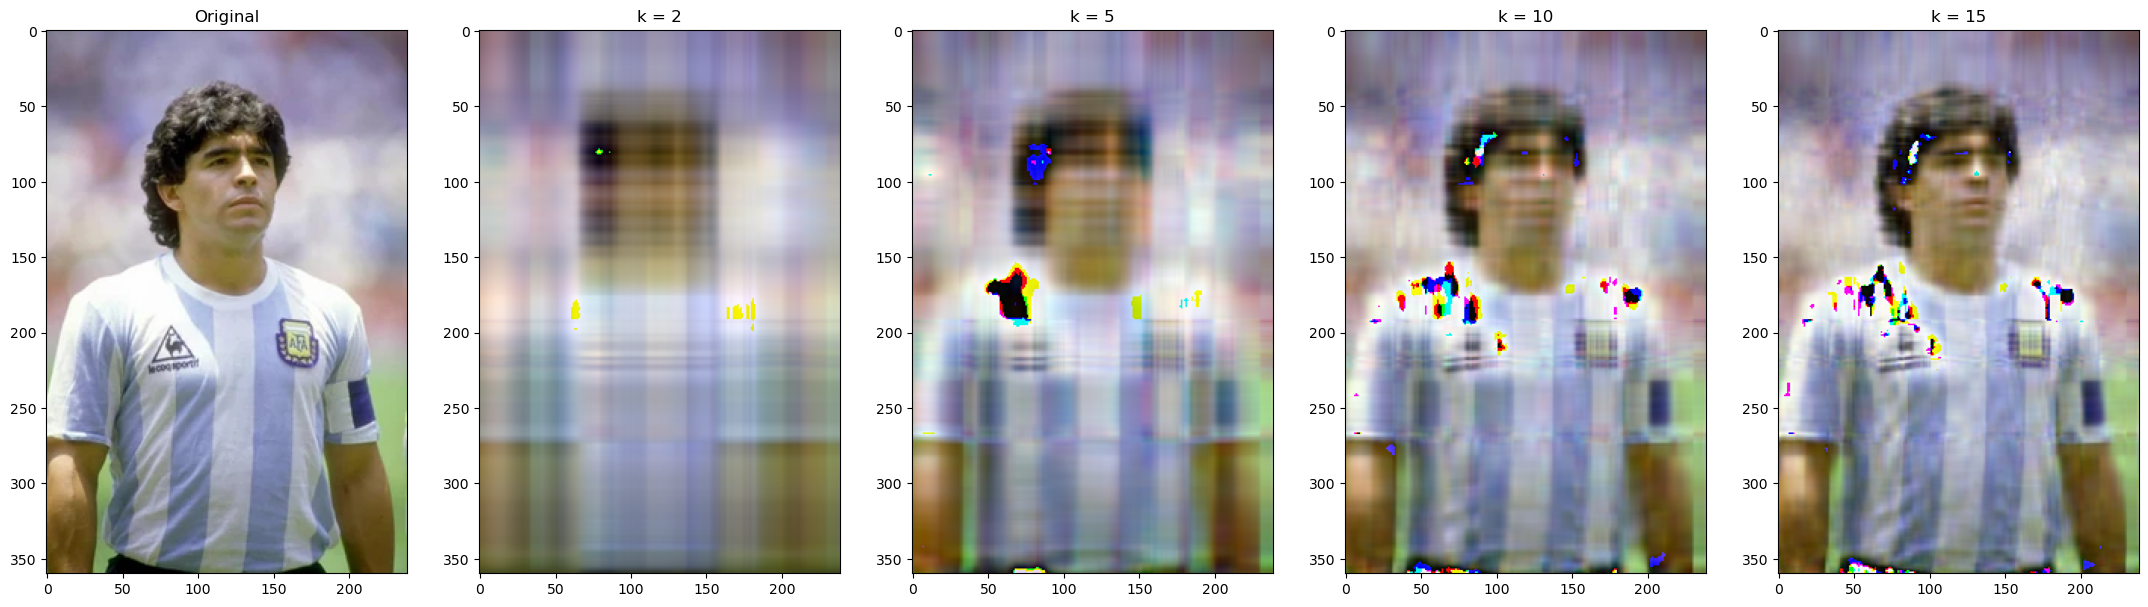

In [10]:
valores_k = [2, 5, 10, 15] # Definir valores de k
img_rank_k(img1,valores_k)

#### Probando con una imagen y valores de k diferentes

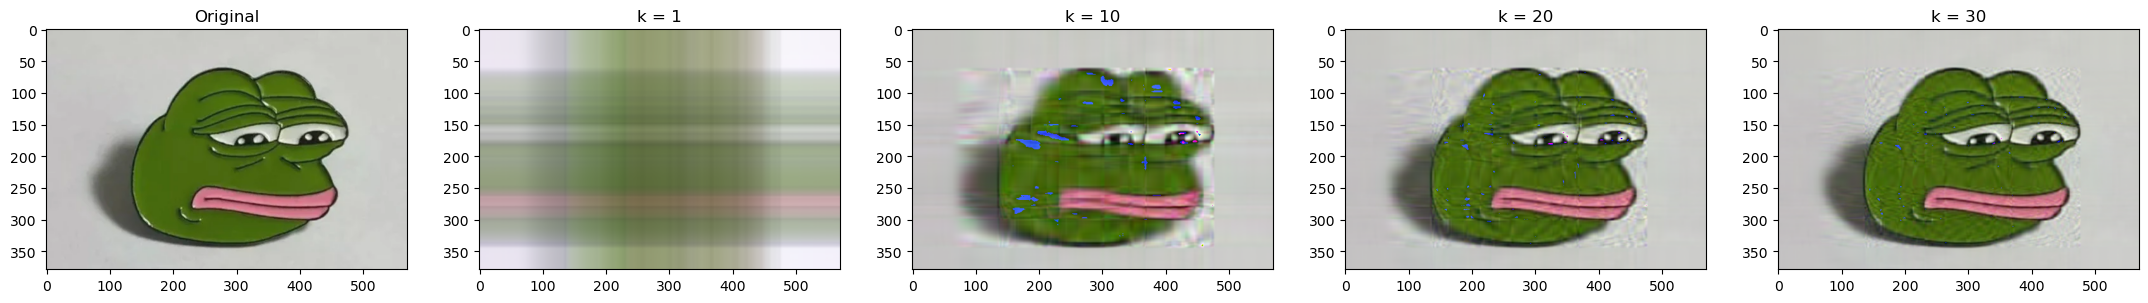

In [11]:
valores_k = [1, 10, 20, 30]
img_rank_k(img2,valores_k)